# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

Importing libraries

In [0]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Flatten

To downlaod Training dataset

In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-05-12 03:05:09--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  10.7MB/s    in 19s     

2020-05-12 03:05:28 (9.34 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



To downlaod Testing dataset

In [3]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-05-12 03:05:31--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  11.0MB/s    in 7.7s    

2020-05-12 03:05:39 (7.92 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

Checking that the files are downloaded

In [4]:
!ls -lh 

total 235M
drwxr-xr-x 1 root root 4.0K May  4 16:26 sample_data
-rw-r--r-- 1 root root  62M Dec  6  2011 test_32x32.mat
-rw-r--r-- 1 root root 174M Dec  6  2011 train_32x32.mat


In [0]:
# Load the dataset
def load_data():
    train = loadmat('train_32x32.mat')
    test = loadmat('test_32x32.mat')

    return train, test

train, test = load_data()

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [0]:
import numpy as np

def transpose_images(images):
    # transposing the image arrays
    imgs = images["X"]
    imgs = np.transpose(imgs, (3, 0, 1, 2))
    labels = images["y"]

    return imgs, labels

In [0]:
train_images, train_labels = transpose_images(train)
test_images, test_labels = transpose_images(test)


### If running on local machine then uncomment these 3 cells

Printing the shapes of all data

In [8]:
print(f"Training image set : {train_images.shape}")
print(f"Testing image set : {test_images.shape}")
print('\n')
print(f"Total images : {train_images.shape[0] + test_images.shape[0]}")

Training image set : (73257, 32, 32, 3)
Testing image set : (26032, 32, 32, 3)


Total images : 99289


Defining function to plot image smaples

In [0]:
def plot_images(img, labels, rows=2, cols=5):
    # Plot rows x cols images
    fig, axes = plt.subplots(rows, cols)
    for i, axis in enumerate(axes.flat):
        # For plotting RGB images
        if img[i].shape == (32, 32, 3):
            axis.imshow(img[i])
        # For plotting Grayscale images by removing last dimension (color)
        else:
            axis.imshow(img[i,:,:,0])
        axis.set_xticks([])
        axis.set_yticks([])
        axis.set_title(labels[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


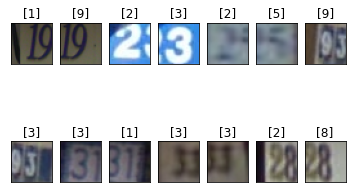

In [10]:
# Plotting training images
plot_images(train_images, train_labels,2, 7)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


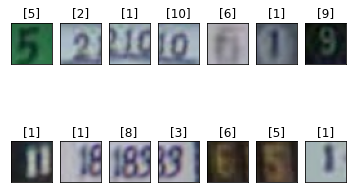

In [11]:
# Plotting testing images
plot_images(test_images, test_labels, 2, 7)

In [12]:
# To know all unique labels present in dataset
print(np.unique(train_labels))

[ 1  2  3  4  5  6  7  8  9 10]


In [13]:
# Converting label 10 to 0 in labels dataset
train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


Converting RGB images to Grayscale

In [0]:
# To convert rgb to gray images with formula Gray = (0.2990R + 0.5870G + 0.1140B)
def convert_to_gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
train_grayscale = convert_to_gray(train_images).astype(np.float32)
test_grayscale = convert_to_gray(test_images).astype(np.float32)

PLotting Grayscale images

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


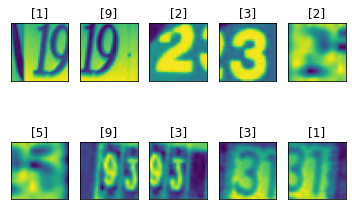

In [16]:
# Ploting the Grayscale Image
plot_images(train_grayscale, train_labels)

Creating validation split from training dataset

In [0]:
# To create a validation set of 10% from training set
from sklearn.model_selection import train_test_split

train_grayscale, val_grayscale, train_labels, val_labels = train_test_split(train_grayscale, train_labels, test_size=0.10)

In [18]:
# Printing new shapes of all datasets
print("Training Images Set", train_grayscale.shape)
print("Training Label Set", train_labels.shape)
print("Testing Images Set", test_grayscale.shape)
print("Testing Label Set", test_labels.shape)
print("Validation Images Set", val_grayscale.shape)
print("Validation Label Set", val_labels.shape)

Training Images Set (65931, 32, 32, 1)
Training Label Set (65931, 1)
Testing Images Set (26032, 32, 32, 1)
Testing Label Set (26032, 1)
Validation Images Set (7326, 32, 32, 1)
Validation Label Set (7326, 1)


Normalizing the images for easier training

In [0]:
def normalize_images(imgs):
    # normalize images so pixel values are in range [0,1]
    mean = np.mean(imgs, axis=0)
    std = np.std(imgs, axis=0)
    imgs = (imgs - mean) / std

    return imgs

In [0]:
train_imgs = normalize_images(train_grayscale)
test_imgs = normalize_images(test_grayscale)
val_imgs = normalize_images(val_grayscale)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


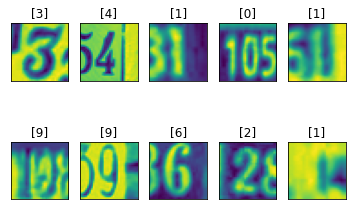

In [21]:
# Ploting the Grayscale Image after normalization
plot_images(train_grayscale, train_labels)

Deleting unused variables to clear RAM

In [0]:
# Deleting unused variables to free RAM
del train_images, test_images
del train, test

# Deleting extra grayscale variables
del train_grayscale, test_grayscale, val_grayscale

In [23]:
print(f"Training Images : 'train_imgs' , Testing Images : 'test_imgs' , Validation Images : 'val_imgs'")
print(f"Training labels : 'train_imgs' , Testing labels : 'test_imgs' , Validation labels : 'val_imgs'")

Training Images : 'train_imgs' , Testing Images : 'test_imgs' , Validation Images : 'val_imgs'
Training labels : 'train_imgs' , Testing labels : 'test_imgs' , Validation labels : 'val_imgs'


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

Function to test accuarcy and loss of model

In [0]:
# To get model accuracy and loss

def test_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    
    print(f'Test Accuracy: {test_acc:0.3f}')
    print(f'Test Loss : {test_loss:0.3f}')

Function to create and compile a MLP Sequential model

In [0]:
def get_mlp_model(shape):
    # Returns a MLP model
    model = Sequential([
        Flatten(input_shape=shape),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
        ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

Creating a MLP model and prining it's summary

In [26]:
mlp_model = get_mlp_model(train_imgs[0].shape)
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 156,618
Trainable params: 156,618
Non-trainable params: 0
_________________________________________________________________


In [27]:
# To get testing accuracy and loss before training

test_model(mlp_model, test_imgs, test_labels)

Test Accuracy: 0.077
Test Loss : 2.473


Functions for creating callbacks during model fitting

In [0]:
# Defining callbacks functions

def get_checkpoint_every_epoch(folder):
    # Creates checkpoint for every epoch
    path = 'checkpoints/every_epoch/' + folder
    checkpoint_every_epoch = ModelCheckpoint(filepath=path,
                             frequency='epoch',
                             save_weights_only=True,
                             verbose=1)
    return checkpoint_every_epoch

def get_checkpoint_best_only(folder):
    # Creates checkpoint for best validation accuracy
    path = 'checkpoints/best_only/' + folder + '/checkpoint'
    checkpoints_best_only = ModelCheckpoint(filepath=path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_accuracy',
                             verbose=1)
    return checkpoints_best_only, path

def get_early_stopping(patience=3):
    # Creates earlystopping callback
    return EarlyStopping(monitor='val_accuracy', patience=patience)


Creating callbacks for MLP model

In [0]:
# Creatinng callbacks objects for MLP model
checkpoint_every_epoch = get_checkpoint_every_epoch('checkpoint_{epoch:03d}')
checkpoint_best_only, mlp_best_path = get_checkpoint_best_only('mlp')
early_stopping = get_early_stopping(5)

callbacks = [checkpoint_every_epoch, checkpoint_best_only, early_stopping]

Training (fitting) MLP model and validating it simultaneously and store it's history

In [30]:
# Fitting the MLP model with callbacks and validation set

mlp_history = mlp_model.fit(train_imgs,
                        train_labels,
                        epochs=30,
                        validation_data=(val_imgs, val_labels),
                        callbacks=callbacks,
                        batch_size=512,
                        verbose=0)


Epoch 00001: saving model to checkpoints/every_epoch/checkpoint_001

Epoch 00001: val_accuracy improved from -inf to 0.68687, saving model to checkpoints/best_only/mlp/checkpoint

Epoch 00002: saving model to checkpoints/every_epoch/checkpoint_002

Epoch 00002: val_accuracy improved from 0.68687 to 0.75362, saving model to checkpoints/best_only/mlp/checkpoint

Epoch 00003: saving model to checkpoints/every_epoch/checkpoint_003

Epoch 00003: val_accuracy improved from 0.75362 to 0.76904, saving model to checkpoints/best_only/mlp/checkpoint

Epoch 00004: saving model to checkpoints/every_epoch/checkpoint_004

Epoch 00004: val_accuracy improved from 0.76904 to 0.79675, saving model to checkpoints/best_only/mlp/checkpoint

Epoch 00005: saving model to checkpoints/every_epoch/checkpoint_005

Epoch 00005: val_accuracy improved from 0.79675 to 0.80480, saving model to checkpoints/best_only/mlp/checkpoint

Epoch 00006: saving model to checkpoints/every_epoch/checkpoint_006

Epoch 00006: val_a

Functions for plotting Accuracy and Loss using history of model training

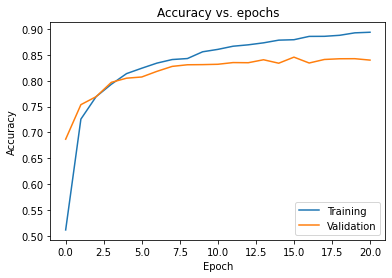

In [31]:
# Plotting the Accuracy graph on history
def plot_accuracy_graph(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except KeyError:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show() 

plot_accuracy_graph(mlp_history)

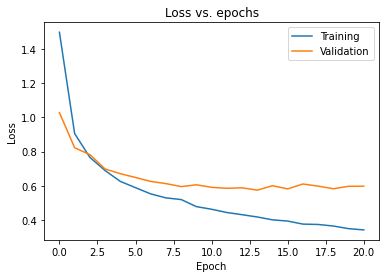

In [32]:
# Plotting the Loss graph from history
def plot_loss_graph(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

plot_loss_graph(mlp_history)

In [33]:
# To find accuracy and loss on testing data after training

test_model(mlp_model, test_imgs,  test_labels)

Test Accuracy: 0.815
Test Loss : 0.731


In [0]:
# Deleting the model to clear RAM

del mlp_model

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

Function to create a CNN model and compile it

In [0]:
def get_cnn_model(shape):
    # Returns CNN model and compiles
    model = Sequential([
                    Conv2D(32, kernel_size=3, activation='relu', padding='SAME', input_shape=shape),
                    BatchNormalization(),
                    Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
                    BatchNormalization(),
                    MaxPooling2D(2),
                    Dropout(0.3),

                    Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
                    BatchNormalization(),
                    Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
                    BatchNormalization(),
                    MaxPooling2D(2),
                    Dropout(0.3),

                    Flatten(),
                    Dense(32, activation='relu'),
                    Dropout(0.3),
                    Dense(10, activation='softmax')
            ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [36]:
# Get a CNN model and prining it's summary

cnn_model = get_cnn_model(train_imgs[0].shape)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)       

In [37]:
# Testing CNN model accuracy and loss before training

test_model(cnn_model, test_imgs, test_labels)

Test Accuracy: 0.085
Test Loss : 2.313


Creating callbacks for CNN model

In [0]:
# Creating callback for CNN model

checkpoint_every_epoch = get_checkpoint_every_epoch('checkpoint_{epoch:03d}')
checkpoint_best_only, cnn_best_path = get_checkpoint_best_only('cnn')
early_stopping = get_early_stopping(5)

callbacks = [checkpoint_every_epoch, checkpoint_best_only, early_stopping]

In [39]:
# Fitting the model with batch size of 512 and validating it simultaneously

cnn_history = cnn_model.fit(train_imgs,
                        train_labels,
                        epochs=50,
                        validation_data=(val_imgs, val_labels),
                        callbacks=callbacks,
                        batch_size=512,
                        verbose=0)


Epoch 00001: saving model to checkpoints/every_epoch/checkpoint_001

Epoch 00001: val_accuracy improved from -inf to 0.20257, saving model to checkpoints/best_only/cnn/checkpoint

Epoch 00002: saving model to checkpoints/every_epoch/checkpoint_002

Epoch 00002: val_accuracy improved from 0.20257 to 0.50519, saving model to checkpoints/best_only/cnn/checkpoint

Epoch 00003: saving model to checkpoints/every_epoch/checkpoint_003

Epoch 00003: val_accuracy improved from 0.50519 to 0.75293, saving model to checkpoints/best_only/cnn/checkpoint

Epoch 00004: saving model to checkpoints/every_epoch/checkpoint_004

Epoch 00004: val_accuracy improved from 0.75293 to 0.84548, saving model to checkpoints/best_only/cnn/checkpoint

Epoch 00005: saving model to checkpoints/every_epoch/checkpoint_005

Epoch 00005: val_accuracy improved from 0.84548 to 0.87906, saving model to checkpoints/best_only/cnn/checkpoint

Epoch 00006: saving model to checkpoints/every_epoch/checkpoint_006

Epoch 00006: val_a

Plotting Accuracy and Loss graphs from training history of CNN model

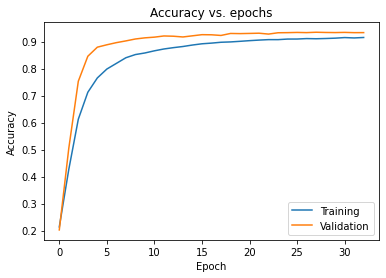

In [40]:
plot_accuracy_graph(cnn_history)

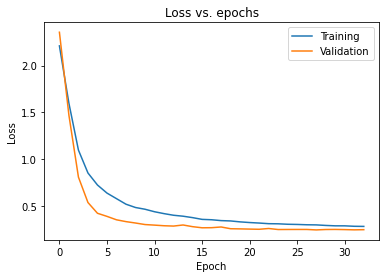

In [41]:
plot_loss_graph(cnn_history)

In [42]:
# Testing CNN model accuracy and loss after training

test_model(cnn_model, test_imgs, test_labels)

Test Accuracy: 0.926
Test Loss : 0.270


In [0]:
# Deleting the model to clear RAM

del cnn_model

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

Checking the location of checkpoint files

In [44]:
! ls -lh checkpoints

total 8.0K
drwxr-xr-x 4 root root 4.0K May 12 03:06 best_only
drwxr-xr-x 2 root root 4.0K May 12 03:07 every_epoch


Creating a new MLP model

In [45]:
new_mlp_model = get_mlp_model(train_imgs[0].shape)
new_mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 156,618
Trainable params: 156,618
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Testing model's accuarcy and loss before loading weights

test_model(new_mlp_model, test_imgs, test_labels)

Test Accuracy: 0.074
Test Loss : 2.478


Loading best weights for MLP model and then testing it's accuarcy and loss after loading weights

In [47]:
new_mlp_model.load_weights(mlp_best_path)
test_model(new_mlp_model, test_imgs, test_labels)

Test Accuracy: 0.814
Test Loss : 0.710


Creating new CNN model

In [48]:
new_cnn_model = get_cnn_model(train_imgs[0].shape)
new_cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)       

In [49]:
# Testing CNN model's accuarcy and loss before loading weights

test_model(new_cnn_model, test_imgs, test_labels)

Test Accuracy: 0.083
Test Loss : 2.320


Loading best weights for CNN model and then testing it's accuarcy and loss after loading weights

In [50]:
new_cnn_model.load_weights(cnn_best_path)
test_model(new_cnn_model, test_imgs, test_labels)

Test Accuracy: 0.928
Test Loss : 0.268


In [0]:
# Selecting random images and their labels from testing dataset

num_rows = 5
num_cols = 5

random_slices = np.random.choice(test_imgs.shape[0], num_rows*num_cols)
random_images = test_imgs[random_slices]
random_labels = test_labels[random_slices]

In [0]:
# Converting numpy array to normal list 

random_labels = [[x][0][0] for x in np.ndarray.tolist(random_labels)]

Predicting labels of random images using new CNN model

In [0]:
random_MLP_predictions = new_mlp_model.predict(random_images)
random_CNN_predictions = new_cnn_model.predict(random_images)

Functions to plot predictions with bar graph

In [0]:
def plot_prediction_images(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"True:{true_label} Pred:{predicted_label} with {100*np.max(predictions_array):2.0f}%",color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [0]:
# Plotting random images from test dataset, their predicted labels, and the true labels.
# Correct predictions are in blue and incorrect predictions are in red.

def plot_predictions(predictions):
    num_images = num_rows*num_cols

    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_prediction_images(i, predictions[i], random_labels, random_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], random_labels)
        
    plt.tight_layout()
    plt.show()

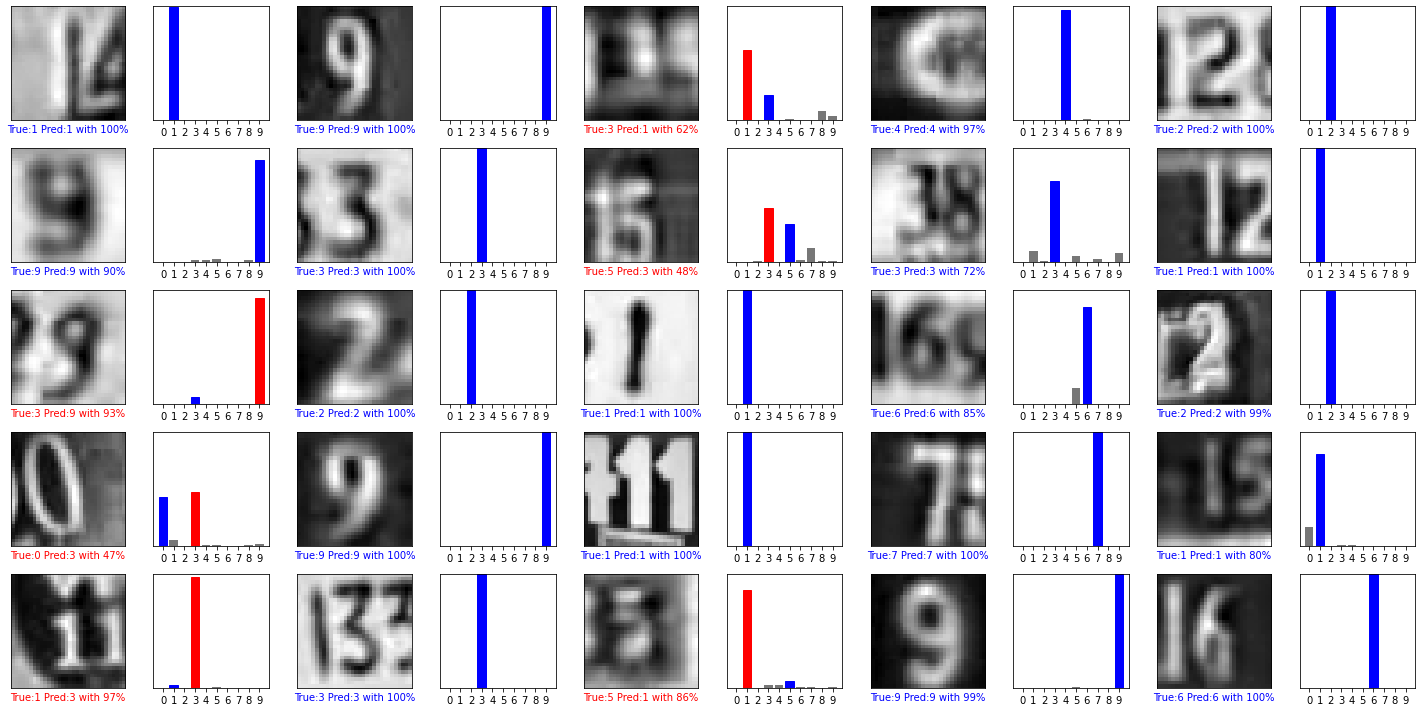

In [56]:
# Plotting MLP predictions

plot_predictions(random_MLP_predictions)

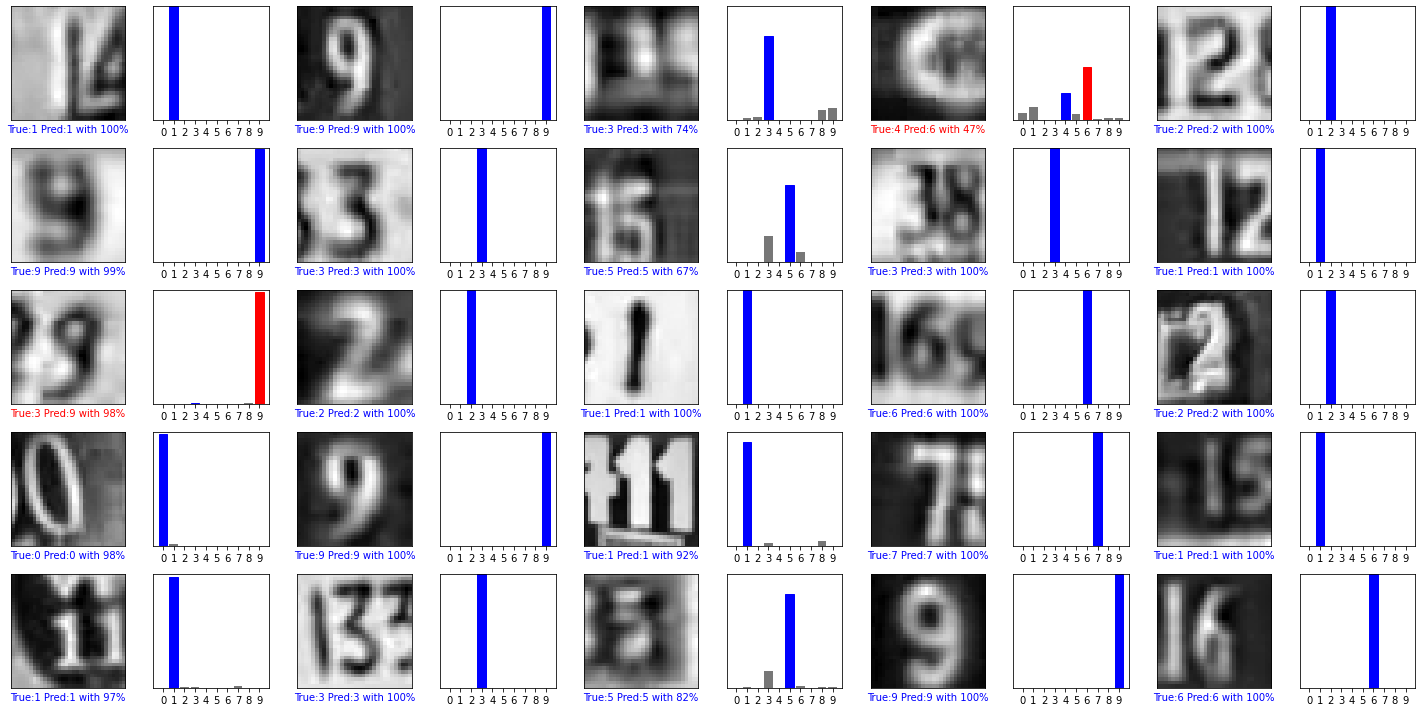

In [57]:
# Plotting CNN predictions

plot_predictions(random_CNN_predictions)